<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NHL-predictions-project---Data-Interpretation" data-toc-modified-id="NHL-predictions-project---Data-Interpretation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NHL predictions project - Data Interpretation</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#General-Data-Analytics" data-toc-modified-id="General-Data-Analytics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>General Data Analytics</a></span></li><li><span><a href="#Game-result-estimation" data-toc-modified-id="Game-result-estimation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Game result estimation</a></span><ul class="toc-item"><li><span><a href="#Data-Analytics-about-the-two-teams" data-toc-modified-id="Data-Analytics-about-the-two-teams-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Analytics about the two teams</a></span></li><li><span><a href="#Model-1---Logistic-Regression" data-toc-modified-id="Model-1---Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model 1 - Logistic Regression</a></span></li><li><span><a href="#Model-2---based-on-matches-between-2-teams" data-toc-modified-id="Model-2---based-on-matches-between-2-teams-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model 2 - based on matches between 2 teams</a></span></li></ul></li></ul></div>

# NHL predictions project - Data Interpretation

This is project for the subject Data Processing in Python - JEM207. That was created by Pavlína Křenková and Vojtěch Vaverka.

The code we wrote scrapes data from the website https://nhl.cz/. After the data is scraped, user of the code needs to fill in names of two teams into the variables team_1 and team_2. Once those two variables are set the code creates a Logistic regression that predicts which team is going to win. Druing our testing of the code we have reached accuracy above 50%. That means that the model is better than randomly guessing. Yet it should not be used to place bets.

First, we will prepare the data. Then, we will perform several analysis to familiarize even the non-hockey readers with the teams and their recent performence. Finally we estimate <span style="color:red">2 (?)</span> models to predict an outcome of the game. This prediction can be used for entertainment or casual betting; however, the authors do not take any responsibility if a user decides to do so.

# Preparation

### Importing the packages

* *pandas* - loading and working with the DataFrames
* *numpy* - working with matrices when building the logistic regression
* *matplotlib* - used for data visualization
* *sklearn* - used to build the logistic regression 
* *seaborn* - used for data visualization
* *statistics* - to compute the averages
* *ipywidgets* - for dropdown menus to choose which teams to analyze

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from statistics import mean
from ipywidgets import Dropdown
import itertools

We load the necessary information about the teams, which we will later use for file loading and analysis

In [2]:
teams_info = pd.read_csv('teams_info/teams_info.csv')
all_matches = pd.read_csv('all_matches.csv')

# We will be analysing the 5 most recent seasons
seasons_used = ['2017', '2018', '2019', '2020','2021'] # 2017 is the 2017/2018 season, etc.

distinct_teams = teams_info['team'].tolist() # the list of all teams

#each team has its short name that was used to name the files that contain data
teams_dict = pd.Series(teams_info.team_short.values,index=teams_info.team).to_dict()
teams_dict

{'Anaheim Ducks': 'ANA',
 'Arizona Coyotes': 'ARI',
 'Boston Bruins': 'BOS',
 'Buffalo Sabres': 'BUF',
 'Calgary Flames': 'CGY',
 'Carolina Hurricanes': 'CAR',
 'Chicago Blackhawks': 'CHI',
 'Colorado Avalanche': 'COL',
 'Columbus Blue Jackets': 'CBJ',
 'Dallas Stars': 'DAL',
 'Detroit Red Wings': 'DET',
 'Edmonton Oilers': 'EDM',
 'Florida Panthers': 'FLA',
 'Los Angeles Kings': 'LAK',
 'Minnesota Wild': 'MIN',
 'Montreal Canadiens': 'MTL',
 'Nashville Predators': 'NSH',
 'New Jersey Devils': 'NJD',
 'New York Islanders': 'NYI',
 'New York Rangers': 'NYR',
 'Ottawa Senators': 'OTT',
 'Philadelphia Flyers': 'PHI',
 'Pittsburgh Penguins': 'PIT',
 'San Jose Sharks': 'SJS',
 'Seattle Kraken': 'SEA',
 'St. Louis Blues': 'STL',
 'Tampa Bay Lightning': 'TBL',
 'Toronto Maple Leafs': 'TOR',
 'Vancouver Canucks': 'VAN',
 'Vegas Golden Knights': 'VGK',
 'Washington Capitals': 'WSH',
 'Winnipeg Jets': 'WPG'}

In [3]:
all_dfs_pre = []
for one_team in distinct_teams:
    one_team_short = teams_dict[one_team]
    matches_one_team = pd.read_csv(f'teams_pre-processed/{one_team_short}_pre.csv')
    all_dfs_pre.append(matches_one_team)
all_dfs_pre[1].head()

,game_id,team_home,team_away,goals_home,goals_away,OT,points_home,points_away,TOI_home,TOI_points,TOI_goals_scored,TOI_goals_rec,TOI_result,other_team,TOI,season
0,/zapas/2526065,Anaheim Ducks,Arizona Coyotes,5,4,0,3.0,0.0,0.0,0.0,4.0,5.0,0.0,Anaheim Ducks,Arizona Coyotes,2017
1,/zapas/2526080,Arizona Coyotes,Vegas Golden Knights,1,2,1,1.0,2.0,1.0,1.0,1.0,2.0,0.0,Vegas Golden Knights,Arizona Coyotes,2017
2,/zapas/2526099,Vegas Golden Knights,Arizona Coyotes,5,2,0,3.0,0.0,0.0,0.0,2.0,5.0,0.0,Vegas Golden Knights,Arizona Coyotes,2017
3,/zapas/2526110,Arizona Coyotes,Detroit Red Wings,2,4,0,0.0,3.0,1.0,0.0,2.0,4.0,0.0,Detroit Red Wings,Arizona Coyotes,2017
4,/zapas/2526126,Arizona Coyotes,Boston Bruins,2,6,0,0.0,3.0,1.0,0.0,2.0,6.0,0.0,Boston Bruins,Arizona Coyotes,2017


# General Data Analytics

In this section we will analyze the data and provide some interesting insights.

### Home advantage

### For each team over all seasons

We first checked if the ratio of home games to away games was approximately 1:1 for each team (the list *ratio_of_home_games*). So that we could use the following calculation for home advantage without it favoring teams that played the majority of games at home.

$ \text{Home advantage} = \frac{\text{Games Won at Home}}{\text{Games Won Home and Away}} $

In [4]:
ratio_of_home_games = []
for one_df in all_dfs_pre:
    hg = (sum((one_df['TOI_home'] == 1)))/len(one_df['TOI_home'] == 1)
    ratio_of_home_games.append(hg) 
print(ratio_of_home_games)#the home:away ratios are very balanced 

[0.5013404825737265, 0.4946236559139785, 0.5, 0.5013477088948787, 0.4946236559139785, 0.4972972972972973, 0.49731182795698925, 0.4946236559139785, 0.5026881720430108, 0.49865229110512127, 0.5040214477211796, 0.4959785522788204, 0.5013477088948787, 0.49731182795698925, 0.5013477088948787, 0.5040214477211796, 0.5013477088948787, 0.49865229110512127, 0.5027027027027027, 0.5026881720430108, 0.5040214477211796, 0.5013477088948787, 0.5013477088948787, 0.5026881720430108, 0.5, 0.49865951742627346, 0.49731182795698925, 0.49731182795698925, 0.5013477088948787, 0.5040214477211796, 0.49595687331536387, 0.5040214477211796]


In [5]:
home_advantages = {}
for x in range(len(distinct_teams)):
    one_team = distinct_teams[x]
    matches_one_team = all_dfs_pre[x]
    home_ad = (sum((matches_one_team['TOI_home'] == 1) & (matches_one_team['TOI_result'] == 1)))/sum(matches_one_team['TOI_result'] == 1)
    home_advantages[one_team] = home_ad
home_advantages = sorted(home_advantages.items(), key=lambda x: x[1], reverse = True)
home_advantages = pd.DataFrame(home_advantages, columns=['team', 'home_advantage'])
home_advantages

,team,home_advantage
0,Seattle Kraken,0.592593
1,Ottawa Senators,0.586957
2,Detroit Red Wings,0.576923
3,Dallas Stars,0.570681
4,Buffalo Sabres,0.570370
5,Pittsburgh Penguins,0.565421
6,Florida Panthers,0.561905
7,New York Islanders,0.556150
8,Minnesota Wild,0.556098
9,Columbus Blue Jackets,0.555556


In [6]:
home_advantages.loc[home_advantages['home_advantage'] < 0.5]

,team,home_advantage
30,Calgary Flames,0.497487
31,Washington Capitals,0.486239


There seems to be at least a slight home advantage for all teams except Calgary Flames and Washington Capitals.

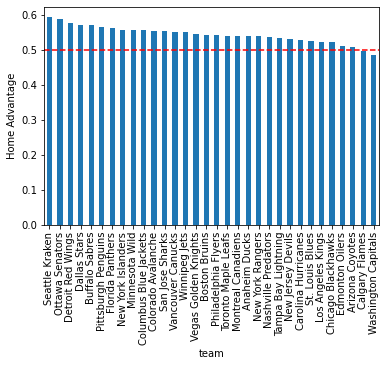

In [7]:
ha = home_advantages.plot(x = 'team', legend=False, kind = "bar")
plt.ylabel("Home Advantage")
plt.axhline(y= 0.5,color='red', linestyle ='dashed')
plt.xticks(rotation='vertical')
plt.show()

### Home advantage for individual seasons over all teams

In [8]:
home_advantage = pd.DataFrame(seasons_used, columns=['year'])
ha = []
for season in seasons_used:
    ha_one_season = sum(all_matches.loc[all_matches['season'] == int(season)]["home_wins"])/len(all_matches.loc[all_matches['season'] == int(season)]["home_wins"])
    ha.append(round(ha_one_season*100,3))
home_advantage["win_home_percentage"] = ha
home_advantage

,year,win_home_percentage
0,2017,56.334
1,2018,53.659
2,2019,53.327
3,2020,53.341
4,2021,53.659


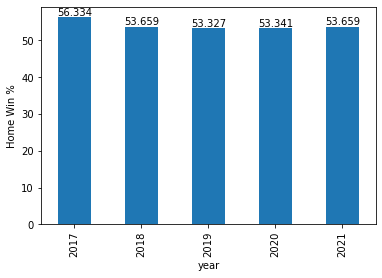

In [9]:
ha = home_advantage.plot(x = 'year', legend=False, kind = "bar")
plt.ylabel("Home Win %")
ha.bar_label(ha.containers[0], labels=home_advantage['win_home_percentage'])
plt.show()

The home advantage seems to be pretty stable over time. 

### Home advantage for all teams and all seasons

In [10]:
sum(all_matches["home_wins"])/len(all_matches["home_wins"])

0.5413507925568574

# Game result estimation

### Choosing two teams

Below are 2 dropdown widgets. Please choose the two teams of your interest.

In [11]:
# ipywidgets do not show on github - run the notebook in order to see them
teams_info = pd.read_csv('teams_info/teams_info.csv')
option_list = teams_info['team'].tolist()
option_list.insert(0, '')
team_1_drop = ''
team_2_drop = ''
drop_down_team_1 = Dropdown(options=option_list,description='Choose the home team (Team 1):',disabled=False, 
                     display='flex',
                     flex_flow='column', align_items='stretch', style= {'description_width': 'initial'},
                     layout={'width': 'max-content'})
drop_down_team_2 = Dropdown(options=option_list,description='Choose the away team (Team 2):',disabled=False, 
                     display='flex',
                     flex_flow='column', align_items='stretch', style= {'description_width': 'initial'},
                     layout={'width': 'max-content'})
def dropdown_handler_team_1(choice):
    global team_1_drop
    print("Team 1:", choice.new)
    team_1_drop = choice.new
def dropdown_handler_team_2(choice):
    global team_2_drop
    print("Team 2:", choice.new)
    team_2_drop = choice.new
drop_down_team_1.observe(dropdown_handler_team_1, names='value')
drop_down_team_2.observe(dropdown_handler_team_2, names='value')
display(drop_down_team_1, drop_down_team_2)

Dropdown(description='Choose the home team (Team 1):', layout=Layout(width='max-content'), options=('', 'Anahe…

Dropdown(description='Choose the away team (Team 2):', layout=Layout(width='max-content'), options=('', 'Anahe…

Now we check whether the choice was made.

In [12]:
if team_1_drop == "" or team_2_drop == "":  
    print("You have not chosen both teams yet, please return to previous cell and do so. \n"
    "If both teams are not chosen, the game between Boston Bruins and Tampa Bay Lightning will be predicted.")
    
    # A base arbitrary choice was made, so that all cells can be run at once.
    team_1 = "Boston Bruins"
    team_2 = "Tampa Bay Lightning"
    
    
elif team_1_drop == team_2_drop:
    
    print("You picked the same team twice, please return to previous cell and change at least one team.")
    # A base arbitrary choice was made, so that analysis can continue if user does not specify..
    # ..teams correctly
    team_1 = team_1_drop
    if team_1 == "Boston Bruins":
        team_2 = "Tampa Bay Lightning"
    else:
        team_2 = "Boston Bruins"
    
else:
    print("The outcome of the match", team_1_drop, "vs", team_2_drop, "will be predicted.")
    team_1 = team_1_drop
    team_2 = team_2_drop

You have not chosen both teams yet, please return to previous cell and do so. 
If both teams are not chosen, the game between Boston Bruins and Tampa Bay Lightning will be predicted.


We obtain the short names of the teams and load the file with the processed data, that was created by *scraping.py* and *processing.py*

In [13]:
team_1_short = teams_dict[team_1]
team_2_short = teams_dict[team_2]

Variable names mean the following:
* *game_id* - unique game ID
* *TOI_result* - did Team of Interest (from now *TOI*, the team to which this dataframe belongs) win ( = 1) or loose ( = 0)
* *TOI_home* - did TOI play home ( = 1) or away ( = 0)
* *other_team* - who was the other team in the game
* *TOI_points_tot* - how many points did TOI gain in the last 20 games
* *TOI_goals_scored_tot* - how many goals did TOI score in the last 20 games
* *TOI_goals_rec_tot* - how many goals did TOI receive in the last 20 games
* *other_team_points_tot* - how many points did the other team gain in the last 20 games
* *other_team_goals_scored_tot* - how many goals did the other team score in the last 20 games
* *other_team_goals_rec_tot* - how many goals did the other team receive in the last 20 games

This <span style="color:red">word</span> is not black, it is red <span style="color:pink">:--)</span>.

## Data Analytics about the two teams

In this section we analyze the two teams so that the user can have an idea about them. For example how good they generally are or how do their results change over time

### After picking 2 teams both their final_dfs are found, saved and displayed

In [14]:
matches_team_1s = pd.read_csv(f'teams_final/{team_1_short}.csv')
matches_team_2s = pd.read_csv(f'teams_final/{team_2_short}.csv')
matches_between_them = matches_team_1s.merge(matches_team_2s, left_on='game_id', right_on='game_id',suffixes=('', '2'))
matches_between_them.drop(columns=['TOI_result2', 'TOI_home2','TOI2','other_team2','TOI_points_tot2','TOI_goals_scored_tot2','TOI_goals_rec_tot2'], inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
matches_between_them.head()

,game_id,TOI_result,TOI_home,TOI,other_team,TOI_points_tot,TOI_goals_scored_tot,TOI_goals_rec_tot,other_team_points_tot,other_team_goals_scored_tot,other_team_goals_rec_tot,other_team_points_tot2,other_team_goals_scored_tot2,other_team_goals_rec_tot2
0,/zapas/2526431,1.0,1.0,Boston Bruins,Tampa Bay Lightning,30.0,56.0,59.0,42.0,70.0,47.0,30.0,56.0,59.0
1,/zapas/2527156,1.0,0.0,Boston Bruins,Tampa Bay Lightning,38.0,72.0,59.0,37.0,81.0,70.0,38.0,72.0,59.0
2,/zapas/2527244,1.0,1.0,Boston Bruins,Tampa Bay Lightning,34.0,64.0,61.0,34.0,72.0,68.0,34.0,64.0,61.0
3,/zapas/2527287,0.0,0.0,Boston Bruins,Tampa Bay Lightning,36.0,70.0,59.0,34.0,72.0,69.0,36.0,70.0,59.0
4,/zapas/2647632,0.0,0.0,Boston Bruins,Tampa Bay Lightning,30.0,45.0,48.0,38.0,82.0,65.0,30.0,45.0,48.0


In [15]:
pd.set_option("display.max_rows", 15, "display.max_columns", 15)

#### We create data frames for graphs and we ad variable match_ordr that displays the order of matches of a given team

In [16]:
matches_team_1_graphs = pd.read_csv(f'teams_pre-processed/{team_1_short}_pre.csv')
matches_team_2_graphs = pd.read_csv(f'teams_pre-processed/{team_2_short}_pre.csv')
matches_team_1_graphs['match_ordr'] = range(1, len(matches_team_1_graphs) + 1)
matches_team_2_graphs['match_ordr'] = range(1, len(matches_team_2_graphs) + 1)
matches_team_2_graphs.head()

,game_id,team_home,team_away,goals_home,goals_away,OT,points_home,...,TOI_goals_scored,TOI_goals_rec,TOI_result,other_team,TOI,season,match_ordr
0,/zapas/2526068,Tampa Bay Lightning,Florida Panthers,5,3,0,3.0,...,5.0,3.0,1.0,Florida Panthers,Tampa Bay Lightning,2017,1
1,/zapas/2526073,Florida Panthers,Tampa Bay Lightning,5,4,0,3.0,...,4.0,5.0,0.0,Florida Panthers,Tampa Bay Lightning,2017,2
2,/zapas/2526090,Tampa Bay Lightning,Washington Capitals,4,3,1,2.0,...,4.0,3.0,1.0,Washington Capitals,Tampa Bay Lightning,2017,3
3,/zapas/2526105,Tampa Bay Lightning,Pittsburgh Penguins,5,4,0,3.0,...,5.0,4.0,1.0,Pittsburgh Penguins,Tampa Bay Lightning,2017,4
4,/zapas/2526122,Tampa Bay Lightning,St. Louis Blues,2,1,0,3.0,...,2.0,1.0,1.0,St. Louis Blues,Tampa Bay Lightning,2017,5


### Merge both teams into one dataframe and create a graph of scored goals

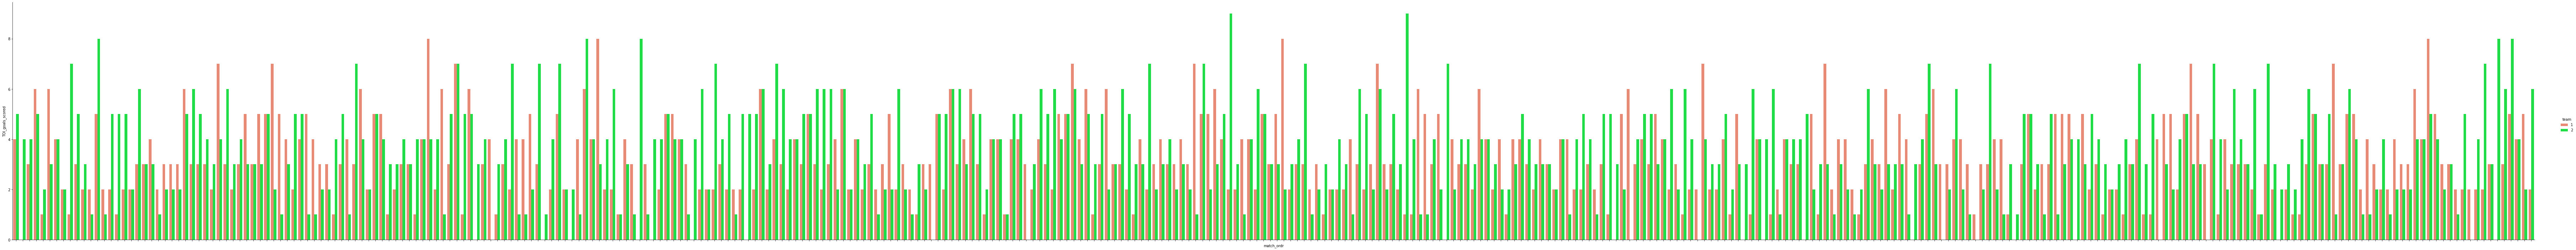

In [17]:
graphs = pd.concat([matches_team_1_graphs, matches_team_2_graphs], axis=0, ignore_index=False)
graphs['team'] = (len(matches_team_1_graphs)*(1,) + len(matches_team_2_graphs)*(2,))
graph_1 = sns.catplot(x='match_ordr', y='TOI_goals_scored', hue='team', kind='bar', data=graphs, height=10, aspect=10, palette=["#FA7F63", "#00FC35"])
graph_1.set(xticklabels=[])
plt.show()

#### Too many matches we need to limit the data to last 30 matches

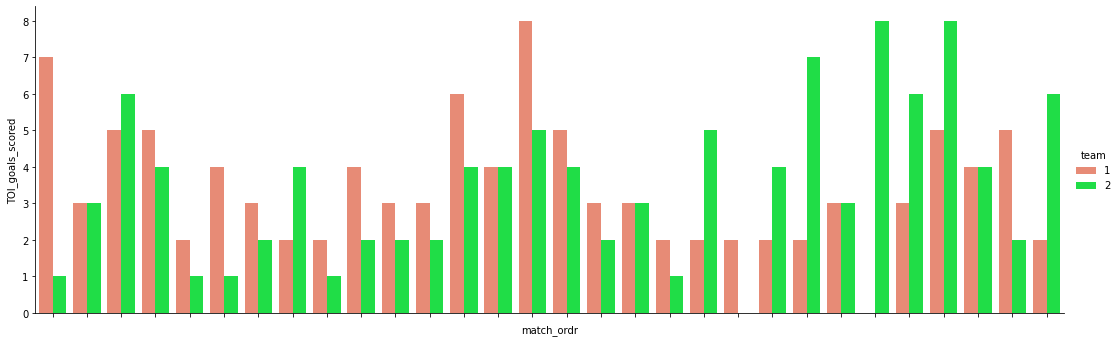

In [18]:
matches_team_1_graphs_30 = matches_team_1_graphs.tail(30)
matches_team_2_graphs_30 = matches_team_2_graphs.tail(30)
graphs_30_matches = pd.concat([matches_team_1_graphs_30, matches_team_2_graphs_30], axis=0, ignore_index=False)
graphs_30_matches['team'] = (len(matches_team_1_graphs_30)*(1,) + len(matches_team_2_graphs_30)*(2,))
graphs_30_matches
graph_2 = sns.catplot(x='match_ordr', y='TOI_goals_scored', hue='team', kind='bar', data=graphs_30_matches, height=5, aspect=3, palette=["#FA7F63", "#00FC35"])
graph_2.set(xticklabels=[])
plt.show()

### Recived Goals

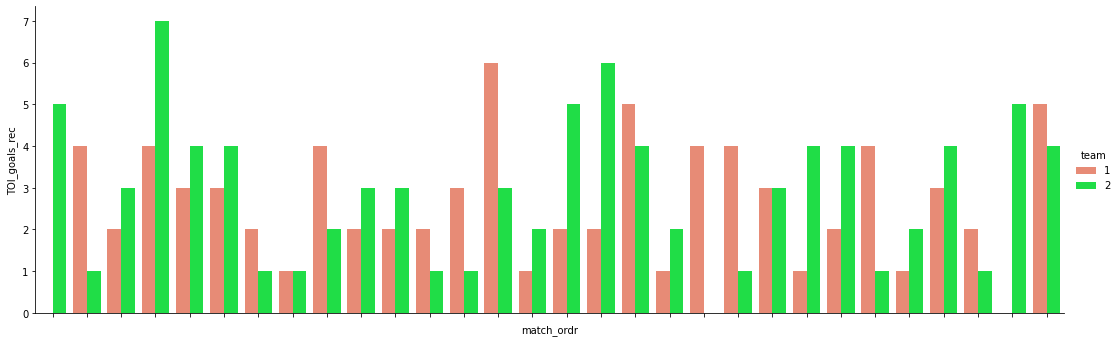

In [19]:
graph_3 = sns.catplot(x='match_ordr', y='TOI_goals_rec', hue='team', kind='bar', data=graphs_30_matches, height=5, aspect=3, palette=["#FA7F63", "#00FC35"])
graph_3.set(xticklabels=[])
plt.show()

### How teams did in last 30 matches

<function matplotlib.pyplot.show(close=None, block=None)>

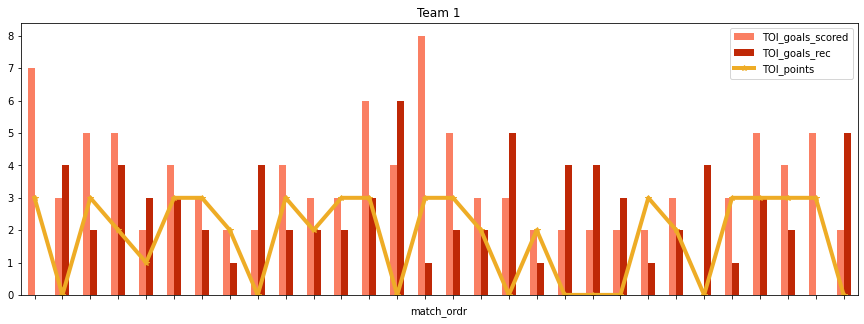

In [20]:
ax = matches_team_1_graphs_30[['TOI_goals_scored','TOI_goals_rec','match_ordr']].plot(
    x='match_ordr',kind='bar',figsize=(15, 5),color=["#FA7F63", "#BF2806"],title='Team 1')
matches_team_1_graphs_30[['TOI_points','match_ordr']].plot(x='match_ordr',  linestyle='-', marker='*',figsize=(15, 5),use_index=False,
                                                   color=["#EEAC26"], lw=4, ax=ax)
ax.set(xticklabels=[])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

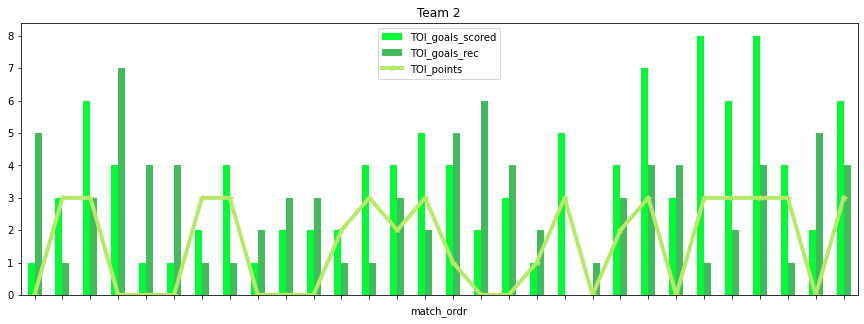

In [21]:
ax = matches_team_2_graphs_30[['TOI_goals_scored','TOI_goals_rec','match_ordr']].plot(
    x='match_ordr',kind='bar',figsize=(15, 5),color=["#00FC35", "#42BB5C"],title='Team 2')
matches_team_2_graphs_30[['TOI_points','match_ordr']].plot(x='match_ordr',  linestyle='-', marker='*',figsize=(15, 5),use_index=False,
                                                   color=["#B6E968"], lw=4, ax=ax)
ax.set(xticklabels=[])
plt.show

## Model 1 - Logistic Regression

In [22]:
matches_team_1 = pd.read_csv(f'teams_final/{team_1_short}.csv')
matches_team_1.head()

,game_id,TOI_result,TOI_home,TOI,other_team,TOI_points_tot,TOI_goals_scored_tot,TOI_goals_rec_tot,other_team_points_tot,other_team_goals_scored_tot,other_team_goals_rec_tot
0,/zapas/2526388,1.0,1.0,Boston Bruins,Pittsburgh Penguins,30.0,54.0,59.0,28.0,52.0,65.0
1,/zapas/2526415,0.0,1.0,Boston Bruins,Edmonton Oilers,30.0,54.0,59.0,20.0,53.0,69.0
2,/zapas/2526431,1.0,1.0,Boston Bruins,Tampa Bay Lightning,30.0,56.0,59.0,42.0,70.0,47.0
3,/zapas/2526450,1.0,0.0,Boston Bruins,Philadelphia Flyers,33.0,56.0,55.0,22.0,49.0,63.0
4,/zapas/2526468,0.0,0.0,Boston Bruins,Nashville Predators,33.0,53.0,53.0,37.0,64.0,58.0


We drop the unnecessary variables which will not be used for modelling.

In [23]:
#dropping unnecessary columns
matches_team_1 = matches_team_1.drop(columns=['game_id', 'TOI','other_team'])

In [24]:
matches_team_1

,TOI_result,TOI_home,TOI_points_tot,TOI_goals_scored_tot,TOI_goals_rec_tot,other_team_points_tot,other_team_goals_scored_tot,other_team_goals_rec_tot
0,1.0,1.0,30.0,54.0,59.0,28.0,52.0,65.0
1,0.0,1.0,30.0,54.0,59.0,20.0,53.0,69.0
2,1.0,1.0,30.0,56.0,59.0,42.0,70.0,47.0
3,1.0,0.0,33.0,56.0,55.0,22.0,49.0,63.0
4,0.0,0.0,33.0,53.0,53.0,37.0,64.0,58.0
...,...,...,...,...,...,...,...,...
347,1.0,1.0,34.0,63.0,54.0,43.0,71.0,44.0
348,1.0,0.0,34.0,62.0,52.0,14.0,57.0,85.0
349,1.0,1.0,34.0,64.0,53.0,44.0,87.0,59.0
350,1.0,1.0,35.0,66.0,54.0,33.0,67.0,71.0


### This is the model we wish to estimate:

$$
\Large p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7)}}
$$

Where:
* the dependent variable is TOI_result - win (1) or loose (0)

And the independent variables $x_1$ to $x_7$ are:
* *TOI_home*
* *TOI_points_tot*
* *TOI_goals_scored_tot*
* *TOI_goals_rec_tot*
* *other_team_points_tot*
* *other_team_goals_scored_tot*
* *other_team_goals_rec_tot*

#### Defining the independent and dependent variables

In [25]:
#independent
x = matches_team_1.iloc[:, 1:].values
#dependent - the result
y = matches_team_1.iloc[:, 0].values

### Splitting into training and test set

In [26]:
matches_team_1.iloc[:, 1:].head() #this is how the dataset looks like now - all the independent variables

,TOI_home,TOI_points_tot,TOI_goals_scored_tot,TOI_goals_rec_tot,other_team_points_tot,other_team_goals_scored_tot,other_team_goals_rec_tot
0,1.0,30.0,54.0,59.0,28.0,52.0,65.0
1,1.0,30.0,54.0,59.0,20.0,53.0,69.0
2,1.0,30.0,56.0,59.0,42.0,70.0,47.0
3,0.0,33.0,56.0,55.0,22.0,49.0,63.0
4,0.0,33.0,53.0,53.0,37.0,64.0,58.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [28]:
X_test[:5]

array([[ 1., 33., 55., 53., 35., 80., 72.],
       [ 0., 34., 67., 62., 23., 45., 61.],
       [ 0., 39., 62., 51., 20., 54., 67.],
       [ 1., 41., 68., 53., 20., 51., 64.],
       [ 0., 45., 61., 41., 34., 59., 54.]])

In [29]:
# rescaling (standardizing) everything except the "home" dummy ... and then adding the dummy back
# since it makes the process faster and does not change predictions
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train[:,1:])
X_test_stand = scaler.transform(X_test[:,1:])
X_train_stand = np.insert(X_train_stand,0,X_train[:,0],axis=1)
X_test_stand = np.insert(X_test_stand,0,X_test[:,0],axis=1)

### Getting the accuracy and confusion matrix

In [30]:
reg = LogisticRegression(max_iter = 400)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [31]:
#how well does the model perform?
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 1 11]
 [ 0 24]]


In [32]:
print("Accuracy :  \n", accuracy_score(y_test, y_pred))

Accuracy :  
 0.6944444444444444


#### Loading the data for the second team

In [33]:
matches_team_2 = pd.read_csv(f'teams_final/{team_2_short}.csv')
matches_team_2.head()

,game_id,TOI_result,TOI_home,TOI,other_team,TOI_points_tot,TOI_goals_scored_tot,TOI_goals_rec_tot,other_team_points_tot,other_team_goals_scored_tot,other_team_goals_rec_tot
0,/zapas/2526382,1.0,1.0,Tampa Bay Lightning,Chicago Blackhawks,45.0,80.0,52.0,30.0,61.0,53.0
1,/zapas/2526392,0.0,0.0,Tampa Bay Lightning,Washington Capitals,44.0,78.0,51.0,27.0,53.0,63.0
2,/zapas/2526407,0.0,0.0,Tampa Bay Lightning,Pittsburgh Penguins,44.0,75.0,49.0,25.0,52.0,67.0
3,/zapas/2526421,1.0,0.0,Tampa Bay Lightning,Buffalo Sabres,42.0,73.0,51.0,20.0,46.0,65.0
4,/zapas/2526431,0.0,0.0,Tampa Bay Lightning,Boston Bruins,42.0,70.0,47.0,30.0,56.0,59.0


### The final prediction of Model 1

We get the info about the last 20 games the teams played and input them into the estimated model

In [34]:
matches_team_1_pre = pd.read_csv(f'teams_pre-processed/{team_1_short}_pre.csv')
matches_team_2_pre = pd.read_csv(f'teams_pre-processed/{team_2_short}_pre.csv')

In [35]:
pred_team_1 = matches_team_1_pre[['TOI_points', 'TOI_goals_scored', 'TOI_goals_rec']].tail(20).sum().values

In [36]:
#How did team 1 do in the last 20 games?
pred_team_1 # points-goals scored-goals received

array([35., 67., 53.])

In [37]:
pred_team_2 = matches_team_2_pre[['TOI_points', 'TOI_goals_scored', 'TOI_goals_rec']].tail(20).sum().values
pred_team_2

array([35., 80., 56.])

In [38]:
TOI_home = np.array([1]) #TOI - team_1 is the home team
values_to_fit = np.concatenate([TOI_home, pred_team_1, pred_team_2]).reshape(1, -1)
final_pred = reg.predict(values_to_fit)
final_pred

array([1.])

In [39]:
if final_pred[0] == 1:
    print('The team', team_1, "is predicted to win this game.")
elif final_pred[0] == 0:
    print('The team', team_2, "is predicted to win this game.")
else:
    print('An error occured along the way. Please try again.')

The team Boston Bruins is predicted to win this game.


### Those values were estimated in the Logistic Regression 

<function matplotlib.pyplot.show(close=None, block=None)>

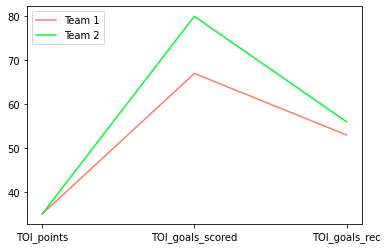

In [40]:
x_coordinates = ['TOI_points', 'TOI_goals_scored', 'TOI_goals_rec']
X_axis = np.arange(len(x_coordinates))
plt.plot(x_coordinates, pred_team_1,'#FA7F63',label="Team 1") 
plt.plot(x_coordinates, pred_team_2,'#00FC35',label="Team 2") 
plt.legend(loc="upper left")
plt.show

### Evaluation of the performance for the Logistic Regression

#### Accuraccy of model 1 for every team

Now we calculate and visualize the accuracy of the logistic regression for every of the 32 teams, print out how many teams have lower accuracy than 50% (random chance), and we also compute the average accuracy over all teams.

In [41]:
#How accurate is the model for individual teams?
accuracies = []
accuracies_dict = {}
for one_team in distinct_teams:
    one_team_short = teams_dict[one_team]
    matches_one_team = pd.read_csv(f'teams_final/{one_team_short}.csv')
    matches_one_team = matches_one_team.drop(columns=['game_id', 'TOI','other_team'])
    x = matches_one_team.iloc[:, 1:].values
    y = matches_one_team.iloc[:, 0].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

    scaler = StandardScaler()
    X_train_stand = scaler.fit_transform(X_train[:,1:])
    X_test_stand = scaler.transform(X_test[:,1:])
    X_train_stand = np.insert(X_train_stand,0,X_train[:,0],axis=1)
    X_test_stand = np.insert(X_test_stand,0,X_test[:,0],axis=1)
    reg = LogisticRegression(max_iter = 400)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracies.append(score)
    accuracies_dict[one_team] = score
    

print(accuracies_dict)
print(sum(acc < 0.5 for acc in accuracies), "teams have lower accuracy than 50%") #4 teams out of 32 have lower then 0.5 accuracy

{'Anaheim Ducks': 0.5277777777777778, 'Arizona Coyotes': 0.5142857142857142, 'Boston Bruins': 0.6944444444444444, 'Buffalo Sabres': 0.6285714285714286, 'Calgary Flames': 0.5555555555555556, 'Carolina Hurricanes': 0.6, 'Chicago Blackhawks': 0.5277777777777778, 'Colorado Avalanche': 0.5555555555555556, 'Columbus Blue Jackets': 0.4722222222222222, 'Dallas Stars': 0.5714285714285714, 'Detroit Red Wings': 0.6388888888888888, 'Edmonton Oilers': 0.6388888888888888, 'Florida Panthers': 0.5833333333333334, 'Los Angeles Kings': 0.5555555555555556, 'Minnesota Wild': 0.6, 'Montreal Canadiens': 0.5277777777777778, 'Nashville Predators': 0.5428571428571428, 'New Jersey Devils': 0.6285714285714286, 'New York Islanders': 0.5142857142857142, 'New York Rangers': 0.45714285714285713, 'Ottawa Senators': 0.75, 'Philadelphia Flyers': 0.5428571428571428, 'Pittsburgh Penguins': 0.42857142857142855, 'San Jose Sharks': 0.5, 'Seattle Kraken': 0.7142857142857143, 'St. Louis Blues': 0.5277777777777778, 'Tampa Bay 

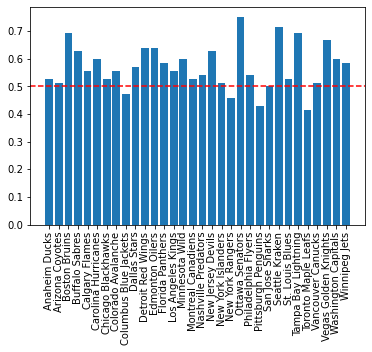

In [42]:
plt.bar(*zip(*accuracies_dict.items()))
plt.xticks(rotation='vertical')
plt.axhline(y= 0.5,color='red', linestyle ='dashed')
plt.show()

And how accurate is the model on average?

In [43]:
mean(accuracies) #the model is 57% accurate, on average

0.5710565476190476

<b>We can see that the model performs relatively good. Being 57% accurate on average, and only 4 teams out of 32 performing worse than a random chance. However, there might be a better solution. Let's try another model.</b>

## Model 2 - based on matches between 2 teams 

<span style="color:red">přidej popisek jak se to počítá prosím</span> myslim že pokud team 1 vyhral vic vzajemnych zapasu tak je estimated to win?

In [44]:
#TOI = team 1 and should be home team to reflect home team advantage
model_2_mathes_filter = matches_team_1_pre[matches_team_1_pre.other_team == team_2].copy()
model_2_mathes_filter['match_ordr'] = range(1, len(model_2_mathes_filter) + 1)
model_2_mathes_filter

,game_id,team_home,team_away,goals_home,goals_away,OT,points_home,...,TOI_goals_scored,TOI_goals_rec,TOI_result,other_team,TOI,season,match_ordr
22,/zapas/2526431,Boston Bruins,Tampa Bay Lightning,3,2,0,3.0,...,3.0,2.0,1.0,Tampa Bay Lightning,Boston Bruins,2017,1
69,/zapas/2527156,Tampa Bay Lightning,Boston Bruins,0,3,0,0.0,...,3.0,0.0,1.0,Tampa Bay Lightning,Boston Bruins,2017,2
75,/zapas/2527244,Boston Bruins,Tampa Bay Lightning,4,2,0,3.0,...,4.0,2.0,1.0,Tampa Bay Lightning,Boston Bruins,2017,3
78,/zapas/2527287,Tampa Bay Lightning,Boston Bruins,4,0,0,3.0,...,0.0,4.0,0.0,Tampa Bay Lightning,Boston Bruins,2017,4
109,/zapas/2647632,Tampa Bay Lightning,Boston Bruins,3,2,0,3.0,...,2.0,3.0,0.0,Tampa Bay Lightning,Boston Bruins,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,/zapas/2807430,Boston Bruins,Tampa Bay Lightning,3,5,0,0.0,...,3.0,5.0,0.0,Tampa Bay Lightning,Boston Bruins,2019,12
310,/zapas/2897351,Boston Bruins,Tampa Bay Lightning,2,3,1,1.0,...,2.0,3.0,0.0,Tampa Bay Lightning,Boston Bruins,2021,13
320,/zapas/2897606,Tampa Bay Lightning,Boston Bruins,2,5,0,0.0,...,5.0,2.0,1.0,Tampa Bay Lightning,Boston Bruins,2021,14
353,/zapas/2898005,Boston Bruins,Tampa Bay Lightning,3,2,0,3.0,...,3.0,2.0,1.0,Tampa Bay Lightning,Boston Bruins,2021,15


In [45]:
model_2_data = sum(model_2_mathes_filter.TOI_result)/len(model_2_mathes_filter.TOI_result)
if model_2_data >= 0.5:
  print(team_1,"will win the match")
elif model_2_data < 0.5:
  print(team_2,"will win the match")
else:
  print("our model can not predict the winner as we do not have data  of", team_1,"facing ",team_2)

Boston Bruins will win the match


### Evaluation of the performance for the Model 2


In [46]:
wins_before_this_match = []
matches_before_this_match = []
for x in model_2_mathes_filter['match_ordr']:
    wins_before_this_match.append(model_2_mathes_filter[(model_2_mathes_filter['match_ordr'] < x)]['TOI_result'].sum())
    matches_before_this_match.append(model_2_mathes_filter[(model_2_mathes_filter['match_ordr'] < x)]['TOI_points'].count())

model_2_mathes_filter['wins_before_this_match'] = wins_before_this_match
model_2_mathes_filter['matches_before_this_match'] = matches_before_this_match
model_2_mathes_filter

,game_id,team_home,team_away,goals_home,goals_away,OT,points_home,...,TOI_result,other_team,TOI,season,match_ordr,wins_before_this_match,matches_before_this_match
22,/zapas/2526431,Boston Bruins,Tampa Bay Lightning,3,2,0,3.0,...,1.0,Tampa Bay Lightning,Boston Bruins,2017,1,0.0,0
69,/zapas/2527156,Tampa Bay Lightning,Boston Bruins,0,3,0,0.0,...,1.0,Tampa Bay Lightning,Boston Bruins,2017,2,1.0,1
75,/zapas/2527244,Boston Bruins,Tampa Bay Lightning,4,2,0,3.0,...,1.0,Tampa Bay Lightning,Boston Bruins,2017,3,2.0,2
78,/zapas/2527287,Tampa Bay Lightning,Boston Bruins,4,0,0,3.0,...,0.0,Tampa Bay Lightning,Boston Bruins,2017,4,3.0,3
109,/zapas/2647632,Tampa Bay Lightning,Boston Bruins,3,2,0,3.0,...,0.0,Tampa Bay Lightning,Boston Bruins,2018,5,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,/zapas/2807430,Boston Bruins,Tampa Bay Lightning,3,5,0,0.0,...,0.0,Tampa Bay Lightning,Boston Bruins,2019,12,5.0,11
310,/zapas/2897351,Boston Bruins,Tampa Bay Lightning,2,3,1,1.0,...,0.0,Tampa Bay Lightning,Boston Bruins,2021,13,5.0,12
320,/zapas/2897606,Tampa Bay Lightning,Boston Bruins,2,5,0,0.0,...,1.0,Tampa Bay Lightning,Boston Bruins,2021,14,5.0,13
353,/zapas/2898005,Boston Bruins,Tampa Bay Lightning,3,2,0,3.0,...,1.0,Tampa Bay Lightning,Boston Bruins,2021,15,6.0,14


In [47]:
def predictions_score(row):
    if row['wins_before_this_match'] >= row['matches_before_this_match']/2:
        val = 1
    else:
        val = 0
    return val    
model_2_mathes_filter['Prediction_score'] = model_2_mathes_filter.apply(predictions_score, axis=1)

In [48]:
def correctness_score(row):
    if row['TOI_result'] == row['Prediction_score']:
        val = 1
    else:
        val = 0
    return val
model_2_mathes_filter['correct_score'] = model_2_mathes_filter.apply(correctness_score, axis=1)

In [49]:
#Remove the first row as we can not use model on it, so the result is wrong
model_2_mathes_filtered = model_2_mathes_filter.iloc[1:].copy() 

In [52]:
accuracy_score_model = round((sum(model_2_mathes_filtered['correct_score'])/max((model_2_mathes_filtered['matches_before_this_match']))*100),2)
if model_2_mathes_filtered.shape[0] == 0:
    print('Can not determine accuracy of the modela as there was not enoug matches betwen',team_1, 'and', team_2)
else:
    print('Accuracy of model based on wins in previous duels is',accuracy_score_model,'%')

Accuracy of model based on wins in previous duels is 40.0 %


In [53]:
def get_accuracy(team1,team2):
    team_1_short = teams_dict[team1]
    matches_team_1_pre = pd.read_csv(f'teams_pre-processed/{team_1_short}_pre.csv')
    model_2_mathes_filter = matches_team_1_pre[matches_team_1_pre.other_team == team2].copy()
    model_2_mathes_filter['match_ordr'] = range(1, len(model_2_mathes_filter) + 1)
    wins_before_this_match = []
    matches_before_this_match = []
    for x in model_2_mathes_filter['match_ordr']:
        wins_before_this_match.append(model_2_mathes_filter[(model_2_mathes_filter['match_ordr'] < x)]['TOI_result'].sum())
        matches_before_this_match.append(model_2_mathes_filter[(model_2_mathes_filter['match_ordr'] < x)]['TOI_points'].count())

    model_2_mathes_filter['wins_before_this_match'] = wins_before_this_match
    model_2_mathes_filter['matches_before_this_match'] = matches_before_this_match
    
    
    def predictions_score(row):
        if row['wins_before_this_match'] >= row['matches_before_this_match']/2:
            val = 1
        else:
            val = 0
        return val    
    model_2_mathes_filter['Prediction_score'] = model_2_mathes_filter.apply(predictions_score, axis=1)
    
    def correctness_score(row):
        if row['TOI_result'] == row['Prediction_score']:
            val = 1
        else:
            val = 0
        return val
    model_2_mathes_filter['correct_score'] = model_2_mathes_filter.apply(correctness_score, axis=1)
    
    # Remove the first row as we can not use model on it, so the resoult is wrong
    model_2_mathes_filtered = model_2_mathes_filter.iloc[1:].copy()
    accuracy_score = round((sum(model_2_mathes_filtered['correct_score'])/max((model_2_mathes_filtered['matches_before_this_match']))),3)
    return accuracy_score
    

In [54]:
all_permutations = list(itertools.permutations(distinct_teams, 2))

In [55]:
model_2_accuraccies = []
team1_accuracies = []
team2_accuracies = []
for couple in all_permutations:
    team1 = couple[0]
    team2 = couple[1]
    couple_accuracy = get_accuracy(team1, team2)
    team1_accuracies.append(team1)
    team2_accuracies.append(team2)
    model_2_accuraccies.append(couple_accuracy)

In [56]:
model_2_acc_df = pd.DataFrame({'team1':team1_accuracies, 'team2':team2_accuracies, 'accuracy':model_2_accuraccies})
model_2_acc_df

,team1,team2,accuracy
0,Anaheim Ducks,Arizona Coyotes,0.435
1,Anaheim Ducks,Boston Bruins,0.333
2,Anaheim Ducks,Buffalo Sabres,0.143
3,Anaheim Ducks,Calgary Flames,0.429
4,Anaheim Ducks,Carolina Hurricanes,0.571
...,...,...,...
987,Winnipeg Jets,Tampa Bay Lightning,0.429
988,Winnipeg Jets,Toronto Maple Leafs,0.529
989,Winnipeg Jets,Vancouver Canucks,0.684
990,Winnipeg Jets,Vegas Golden Knights,0.600


In [57]:
print(max(model_2_acc_df['accuracy']))
print(min(model_2_acc_df['accuracy']))
mean(model_2_acc_df['accuracy'])


1.0
0.0


0.535726814516129

In [58]:
model_2_acc_df.loc[model_2_acc_df['accuracy'] == 1]

,team1,team2,accuracy
32,Arizona Coyotes,Boston Bruins,1.0
52,Arizona Coyotes,Pittsburgh Penguins,1.0
63,Boston Bruins,Arizona Coyotes,1.0
84,Boston Bruins,San Jose Sharks,1.0
85,Boston Bruins,Seattle Kraken,1.0
...,...,...,...
830,Tampa Bay Lightning,Seattle Kraken,1.0
861,Toronto Maple Leafs,Seattle Kraken,1.0
892,Vancouver Canucks,Seattle Kraken,1.0
923,Vegas Golden Knights,Seattle Kraken,1.0


In [59]:
model_2_acc_df.loc[model_2_acc_df['accuracy'] == 0]

,team1,team2,accuracy
178,Carolina Hurricanes,Seattle Kraken,0.0
209,Chicago Blackhawks,Seattle Kraken,0.0
310,Detroit Red Wings,Anaheim Ducks,0.0
333,Detroit Red Wings,Seattle Kraken,0.0
352,Edmonton Oilers,Florida Panthers,0.0
...,...,...,...
766,Seattle Kraken,Pittsburgh Penguins,0.0
773,Seattle Kraken,Washington Capitals,0.0
777,St. Louis Blues,Boston Bruins,0.0
836,Tampa Bay Lightning,Winnipeg Jets,0.0


Since Seattle Kraken only played last season it makes sense that the model perforsm poorly on them, since they did not play many matches

In [60]:
model_2_acc_df.loc[(model_2_acc_df['accuracy'] == 0) & (model_2_acc_df['team1'] != 'Seattle Kraken') & (model_2_acc_df['team2'] != 'Seattle Kraken')]

,team1,team2,accuracy
310,Detroit Red Wings,Anaheim Ducks,0.0
352,Edmonton Oilers,Florida Panthers,0.0
678,Philadelphia Flyers,Vancouver Canucks,0.0
777,St. Louis Blues,Boston Bruins,0.0
836,Tampa Bay Lightning,Winnipeg Jets,0.0


In [61]:
model_2_acc_df.loc[(model_2_acc_df['accuracy'] == 1) & (model_2_acc_df['team1'] != 'Seattle Kraken') & (model_2_acc_df['team2'] != 'Seattle Kraken')]

,team1,team2,accuracy
32,Arizona Coyotes,Boston Bruins,1.0
52,Arizona Coyotes,Pittsburgh Penguins,1.0
63,Boston Bruins,Arizona Coyotes,1.0
84,Boston Bruins,San Jose Sharks,1.0
140,Calgary Flames,New Jersey Devils,1.0
205,Chicago Blackhawks,Ottawa Senators,1.0
226,Colorado Avalanche,Detroit Red Wings,1.0
317,Detroit Red Wings,Colorado Avalanche,1.0
428,Los Angeles Kings,Tampa Bay Lightning,1.0
531,New Jersey Devils,Calgary Flames,1.0


In [62]:
model_2_acc_dff = model_2_acc_df.loc[(model_2_acc_df['team1'] != 'Seattle Kraken') & (model_2_acc_df['team2'] != 'Seattle Kraken')]

In [63]:
print(max(model_2_acc_dff['accuracy']))
print(min(model_2_acc_dff['accuracy']))
mean(model_2_acc_dff['accuracy'])

1.0
0.0


0.5325516129032258

It seems to be more stable when we do not take Seattle Kraken into account (accuracies hitting the values 0 and 1 less often); however the average accuracy is almost the same. 

The second model has similary accuracy, on average, as the Logistic Regression. Many times, it can even perform better. However, it has varying accuracies, from 0% to 100% and does not appear very stable. Overall, we would not recommend it over the Logistic Regression as it is more of a gamble and the Logistic Regression seems to be performing with consistent results and more reliably.